In [44]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches
from skimage import measure, morphology

import numpy as np

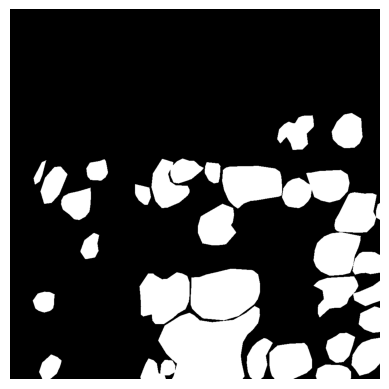

In [24]:
# Set the names
data = "data"
folder = "treecover_segmentation_aerial_goettingen"
mask_path = "masks"
mask_filename = "mask_1.tif"
path_mask = os.path.join("..", data, folder, mask_path, mask_filename)
image_mask = Image.open(path_mask)
mask_array = np.array(image_mask)

plt.imshow(mask_array, cmap='gray')
plt.axis("off")
plt.show()

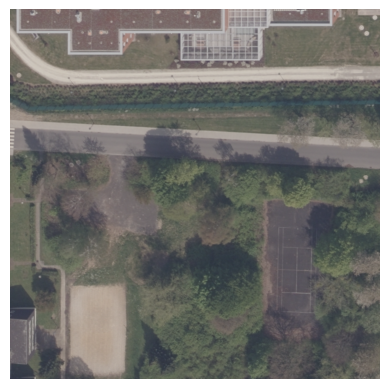

In [14]:
data = "data"
folder = "treecover_segmentation_aerial_goettingen"
tile_path = "tiles"
tile_filename = "tile_1.tif"
path_tile = os.path.join("..", data, folder, tile_path, tile_filename)
image_tile = Image.open(path_tile)

plt.imshow(image_tile)
plt.axis("off")  # Hide axes
plt.show()

In [95]:
# Erode the mask to make trees separate more
def process_mask(mask):
    binary_mask = mask.copy()
    binary_mask = morphology.binary_erosion(binary_mask, footprint=np.ones((6,6)))
    return binary_mask

In [89]:
# Extract bounding box from the mask
def extract_bbox(mask):
    binary_mask = mask.copy()

    labels = measure.label(binary_mask, connectivity=2)
    region_props = measure.regionprops(labels)

    bboxes = []
    centers = []
    for region in region_props:
        bbox = region.bbox # returns: (min_row, min_col, max_row, max_col)
        center = region.centroid # return (row, col)
        bboxes.append(bbox)
        centers.append(center)
    return bboxes, centers


In [90]:
def visualize_bounding_boxes(image, bboxes):
    # Display the image
    plt.imshow(image, cmap='gray')

    # Add bounding boxes
    for bbox in bboxes:
        y_min, x_min, y_max, x_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the plot
        plt.gca().add_patch(rect)

    plt.title(f'Detected Objects: {len(bboxes)}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

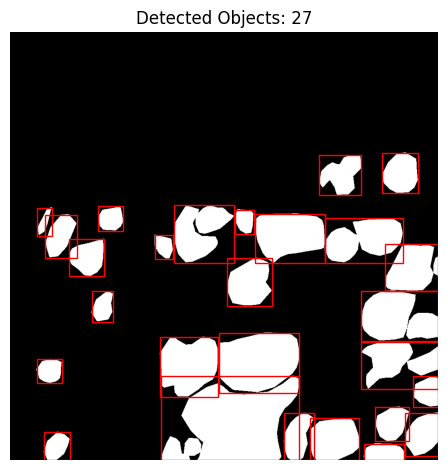

In [91]:
bboxes, _ = extract_bbox(mask_array)
visualize_bounding_boxes(mask_array, bboxes)

# Observe in the mask, some regions are touching each other, making the bounding boxes not generated correctly
# Thinking maybe do an erosion that makes the 1's smaller


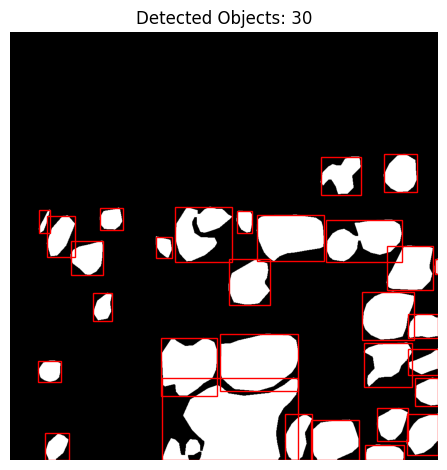

In [96]:
processed_mask = process_mask(mask_array)
second_bboxes, _ = extract_bbox(processed_mask)
visualize_bounding_boxes(processed_mask, second_bboxes)

# Tree detection increased from 27 to 30 for this specific example